In [1]:
import pandas as pd

In [39]:
output1_path = 'first_run_analysis.xlsx'
output2_path = 'f1600662.csv'

## 1. Read data

In [3]:
df1 = pd.read_excel(output1_path)
df1.head()

,url,_unit_id,_created_at,_golden,_id,_missed,_started_at,_tainted,_channel,_trust,_worker_id,_country,_region,_city,_ip,what_is_the_severity_score_to_the_given_story,Actual rating,orig__golden,what_is_the_severity_score_to_the_given_story_gold,what_is_the_severity_score_to_the_given_story_gold_reason
0,https://www.snopes.com/fact-check/clinton-gore...,2765528503,2020-06-17 23:33:22,False,5632976156,NaN,2020-06-17 23:32:41,False,feca,0.6667,45671576,USA,VA,Manassas,23.105.1.250,1,1\n2,False,NaN,NaN
1,https://www.snopes.com/fact-check/clinton-gore...,2765528503,2020-06-17 23:38:54,False,5632984421,NaN,2020-06-17 23:38:21,False,feca,1.0000,45531491,NIC,10,Managua,190.212.96.226,1,1\n2,False,NaN,NaN
2,https://www.snopes.com/fact-check/confederate-...,2765528504,2020-06-17 23:33:22,False,5632976168,NaN,2020-06-17 23:32:41,False,feca,0.6667,45671576,USA,VA,Manassas,23.105.1.250,1,2\n3,False,NaN,NaN
3,https://www.snopes.com/fact-check/confederate-...,2765528504,2020-06-17 23:42:15,False,5632989545,NaN,2020-06-17 23:39:58,False,feca,0.6667,45394241,VEN,4,Cagua,190.72.12.204,1,2\n3,False,NaN,NaN
4,https://www.usatoday.com/story/news/factcheck/...,2765528505,2020-06-17 23:33:22,False,5632976173,NaN,2020-06-17 23:32:41,False,feca,0.6667,45671576,USA,VA,Manassas,23.105.1.250,4,3\n4,False,NaN,NaN


In [5]:
df2 = pd.read_csv(output2_path)
df2.head()

,_unit_id,_created_at,_golden,_id,_missed,_started_at,_tainted,_channel,_trust,_worker_id,...,_city,_ip,true_or_false,what_is_the_severity_score_to_the_given_story,orig__golden,true_or_false_gold,true_or_false_gold_reason,url,what_is_the_severity_score_to_the_given_story_gold,what_is_the_severity_score_to_the_given_story_gold_reason
0,2780911874,7/2/2020 21:28:00,True,5650539105,NaN,7/2/2020 21:27:49,False,feca,0.6,45574481,...,Agua Fria,190.36.75.204,True,NaN,True,True,Given in the fact check site,https://www.snopes.com/fact-check/trump-army-f...,NaN,Given story is not a misinformation as mention...
1,2780911874,7/2/2020 21:28:13,True,5650539341,NaN,7/2/2020 21:27:40,True,feca,0.4,45312025,...,Minneapolis,104.156.201.151,True,NaN,True,True,Given in the fact check site,https://www.snopes.com/fact-check/trump-army-f...,NaN,Given story is not a misinformation as mention...
2,2780911874,7/2/2020 21:28:21,True,5650539492,True,7/2/2020 21:27:42,True,feca,0.0,45630911,...,New York,23.108.16.232,Mixed,3.0,True,True,Given in the fact check site,https://www.snopes.com/fact-check/trump-army-f...,NaN,Given story is not a misinformation as mention...
3,2780911874,7/2/2020 21:28:24,True,5650539513,NaN,7/2/2020 21:27:38,False,feca,0.8,45495146,...,Phoenix,172.241.244.145,True,NaN,True,True,Given in the fact check site,https://www.snopes.com/fact-check/trump-army-f...,NaN,Given story is not a misinformation as mention...
4,2780911874,7/2/2020 21:28:35,True,5650539710,NaN,7/2/2020 21:28:07,True,feca,0.5,45816276,...,Mérida,186.89.50.198,True,NaN,True,True,Given in the fact check site,https://www.snopes.com/fact-check/trump-army-f...,NaN,Given story is not a misinformation as mention...


In [8]:
df2.columns

Index(['_unit_id', '_created_at', '_golden', '_id', '_missed', '_started_at',
       '_tainted', '_channel', '_trust', '_worker_id', '_country', '_region',
       '_city', '_ip', 'true_or_false',
       'what_is_the_severity_score_to_the_given_story', 'orig__golden',
       'true_or_false_gold', 'true_or_false_gold_reason', 'url',
       'what_is_the_severity_score_to_the_given_story_gold',
       'what_is_the_severity_score_to_the_given_story_gold_reason'],
      dtype='object')

## 2. Overall accuracy in valid sample (75 entries)

In [40]:
results = df2[((df2._golden==False) & (df2._trust >= 0.6))]
results.shape

(75, 22)

In [41]:
# merge with correct answers
results = results.merge(df1[['url', 'Actual rating']].drop_duplicates('url'), on='url', how='left')

In [19]:
results['Actual rating'].unique()

array(['1\n2', '2\n3', '3\n4', 1, '3 or 4', '3 or 2'], dtype=object)

In [20]:
results.true_or_false.unique()

array(['True', 'False', 'Mixed'], dtype=object)

In [23]:
results.what_is_the_severity_score_to_the_given_story.unique()

array([nan,  1.,  3.,  2.])

In [24]:
def verify_answers(row):
    """
    Return whether worker answered correctly. 
    
    Verification scheme:
    
    Actual rating | part1, part2
          1       | True, None
          2/3     | False/Mixed, 1/2
          3/4     | False/Mixed, 2/3
          1/2     | (True, None) OR (False/Mixed, 1)
          
    """
    
    part1 = row['true_or_false']
    part2 = row['what_is_the_severity_score_to_the_given_story']
    
    if row['Actual rating'] == 1:
        return part1 == 'True' and pd.isnull(part2)
    elif row['Actual rating'] == '1\n2':
        return (part1 == 'True' and pd.isnull(part2)) or (part1 != 'True' and part2 == 1)
    elif row['Actual rating'] in ['2\n3', '3 or 2']:
        return part1 != 'True' and part2 in [1, 2]
    elif row['Actual rating'] in ['3\n4', '3 or 4']:
        return part1 != 'True' and part2 in [2, 3]
    
    print('unknown', row.name)
    return None

In [42]:
results['right_answer'] = results.apply(verify_answers, axis=1)
results.right_answer.value_counts(dropna=False)

True     39
False    36
Name: right_answer, dtype: int64

In [63]:
results.right_answer.value_counts(dropna=False, normalize=True)

True     0.52
False    0.48
Name: right_answer, dtype: float64

### Accuracy rate per story 

In [50]:
results.groupby('_unit_id').right_answer.mean()

_unit_id
2780911886    0.8
2780911887    0.4
2780911888    0.2
2780911889    0.6
2780911890    0.8
2780911891    0.6
2780911892    0.8
2780911893    0.4
2780911894    0.4
2780911895    0.0
2780911896    0.8
2780911897    0.6
2780911898    0.4
2780911899    0.8
2780911900    0.2
Name: right_answer, dtype: float64

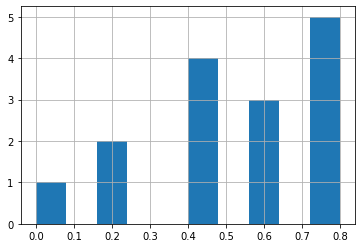

In [49]:
results.groupby('_unit_id').right_answer.mean().hist()

In [65]:
results.groupby('url').right_answer.mean().sort_values(ascending=False)

url
https://www.usatoday.com/story/news/factcheck/2020/06/10/fact-check-does-clorox-splash-less-bleach-formula-disinfect/3169980001/           0.8
https://www.usatoday.com/story/news/factcheck/2020/06/09/fact-check-epa-clears-genetically-modified-mosquitoes-us-release/5327840002/      0.8
https://www.snopes.com/fact-check/george-soros-bring-down-us/                                                                              0.8
https://www.snopes.com/fact-check/clinton-gore-92-confederate/                                                                             0.8
https://www.politifact.com/factchecks/2020/jun/11/viral-image/no-photo-doesnt-show-antifa-member-taped-trump-sup/                          0.8
https://www.usatoday.com/story/news/factcheck/2020/06/05/fact-check-farmers-paid-less-consumers-pay-more-amid-beef-shortage/5311455002/    0.6
https://www.snopes.com/fact-check/trump-administration-fire-lgbtq/                                                                        

In [67]:
results[results.url=='https://www.politifact.com/factchecks/2020/jun/11/facebook-posts/no-donald-trump-church-photo-op-was-not-same-bill-/'][['true_or_false', 'what_is_the_severity_score_to_the_given_story', 'Actual rating']]

,true_or_false,what_is_the_severity_score_to_the_given_story,Actual rating
45,True,NaN,3 or 4
46,True,NaN,3 or 4
47,True,NaN,3 or 4
48,True,NaN,3 or 4
49,False,1.0,3 or 4


In [31]:
# looks like in some cases workers identified the story as True, but actual rating rated it as False
# sometimes the other way around
results[results.right_answer==False][['url', 'true_or_false', 'what_is_the_severity_score_to_the_given_story', 'Actual rating']]

,url,true_or_false,what_is_the_severity_score_to_the_given_story,Actual rating
3,https://www.snopes.com/fact-check/clinton-gore...,True,1.0,1\n2
6,https://www.snopes.com/fact-check/confederate-...,True,NaN,2\n3
8,https://www.snopes.com/fact-check/confederate-...,True,1.0,2\n3
9,https://www.snopes.com/fact-check/confederate-...,True,NaN,2\n3
10,https://www.usatoday.com/story/news/factcheck/...,True,NaN,3\n4
11,https://www.usatoday.com/story/news/factcheck/...,True,NaN,3\n4
12,https://www.usatoday.com/story/news/factcheck/...,True,NaN,3\n4
13,https://www.usatoday.com/story/news/factcheck/...,False,1.0,3\n4
16,https://www.usatoday.com/story/news/factcheck/...,False,2.0,1\n2
18,https://www.usatoday.com/story/news/factcheck/...,True,1.0,1\n2


## 3. Accuracy in part 1 (True of False)

In [72]:
results.true_or_false.value_counts()

True     46
False    27
Mixed     2
Name: true_or_false, dtype: int64

In [51]:
def verify_part1(row):
    part1 = row['true_or_false']
    
    if row['Actual rating'] == 1:
        return part1 == 'True'
    elif row['Actual rating'] == '1\n2':
        return 'Ambiguous'
    elif row['Actual rating'] in ['2\n3', '3 or 2', '3\n4', '3 or 4']:
        return part1 != 'True'
    
results['right_part1'] = results.apply(verify_part1, axis=1)
results.right_part1.value_counts(dropna=False)

True         36
False        29
Ambiguous    10
Name: right_part1, dtype: int64

In [71]:
results.right_part1.value_counts(dropna=False, normalize=True)

True         0.480000
False        0.386667
Ambiguous    0.133333
Name: right_part1, dtype: float64

In [68]:
results['short_url'] = results.url.map(lambda url: '/'.join(url.strip().split('/')[-3:]))
results[results.right_part1=='Ambiguous'][['short_url', 'true_or_false', 'what_is_the_severity_score_to_the_given_story', 'Actual rating']].drop_duplicates()

,short_url,true_or_false,what_is_the_severity_score_to_the_given_story,Actual rating
0,fact-check/clinton-gore-92-confederate/,True,NaN,1\n2
3,fact-check/clinton-gore-92-confederate/,True,1.0,1\n2
15,fact-check-farmers-paid-less-consumers-pay-mor...,True,NaN,1\n2
16,fact-check-farmers-paid-less-consumers-pay-mor...,False,2.0,1\n2
18,fact-check-farmers-paid-less-consumers-pay-mor...,True,1.0,1\n2


In [70]:
results[results.right_part1==False][['short_url', 'true_or_false', 'what_is_the_severity_score_to_the_given_story', 'Actual rating']].drop_duplicates()

,short_url,true_or_false,what_is_the_severity_score_to_the_given_story,Actual rating
6,fact-check/confederate-flag-colors-religious/,True,NaN,2\n3
8,fact-check/confederate-flag-colors-religious/,True,1.0,2\n3
10,fact-check-melinda-gates-covid-19-vaccinations...,True,NaN,3\n4
21,fact-check-epa-clears-genetically-modified-mos...,False,1.0,1
25,fact-check/trump-administration-fire-lgbtq/,False,3.0,1
33,fact-check/george-soros-bring-down-us/,True,NaN,3 or 4
35,09/cops-killed-george-floyd-protests/,True,NaN,3 or 4
42,fact-check/cosmetologists-police-training/,True,NaN,3 or 2
45,facebook-posts/no-donald-trump-church-photo-op...,True,NaN,3 or 4
53,viral-image/no-photo-doesnt-show-antifa-member...,True,NaN,3 or 4


In [62]:
results[results.right_part1==False].url.unique().tolist()

['https://www.snopes.com/fact-check/confederate-flag-colors-religious/',
 'https://www.usatoday.com/story/news/factcheck/2020/06/13/fact-check-melinda-gates-covid-19-vaccinations-black-people/3182343001/',
 'https://www.usatoday.com/story/news/factcheck/2020/06/09/fact-check-epa-clears-genetically-modified-mosquitoes-us-release/5327840002/',
 'https://www.snopes.com/fact-check/trump-administration-fire-lgbtq/',
 'https://www.snopes.com/fact-check/george-soros-bring-down-us/',
 'https://www.snopes.com/news/2020/06/09/cops-killed-george-floyd-protests/',
 'https://www.snopes.com/fact-check/cosmetologists-police-training/',
 'https://www.politifact.com/factchecks/2020/jun/11/facebook-posts/no-donald-trump-church-photo-op-was-not-same-bill-/',
 'https://www.politifact.com/factchecks/2020/jun/11/viral-image/no-photo-doesnt-show-antifa-member-taped-trump-sup/',
 'https://www.politifact.com/factchecks/2020/jun/11/planned-parenthood/yes-if-federal-abortion-law-were-overturned-wiscon/',
 'https